In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv('E:\Jupyter notebook\Customer Segmentation and RFM analysis\sales_data.csv', sep=",", encoding='Latin-1')
data.sort_values(by='ORDERNUMBER')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
578,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2024,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
680,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1267,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
728,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,10425,18,100.00,2,1895.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
393,10425,33,100.00,4,4692.60,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
160,10425,38,100.00,12,5894.94,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
780,10425,19,49.22,10,935.18,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small


## Introduction
1. Firstly I will explore the dataset and make some visualizations
2. I will create a new dataset which is about RFM analysis, then segment the customers with some properties
3. I will use the Kmeans algorithm and several dimensionality reduction techniques

#### Finding Missing values

<AxesSubplot:>

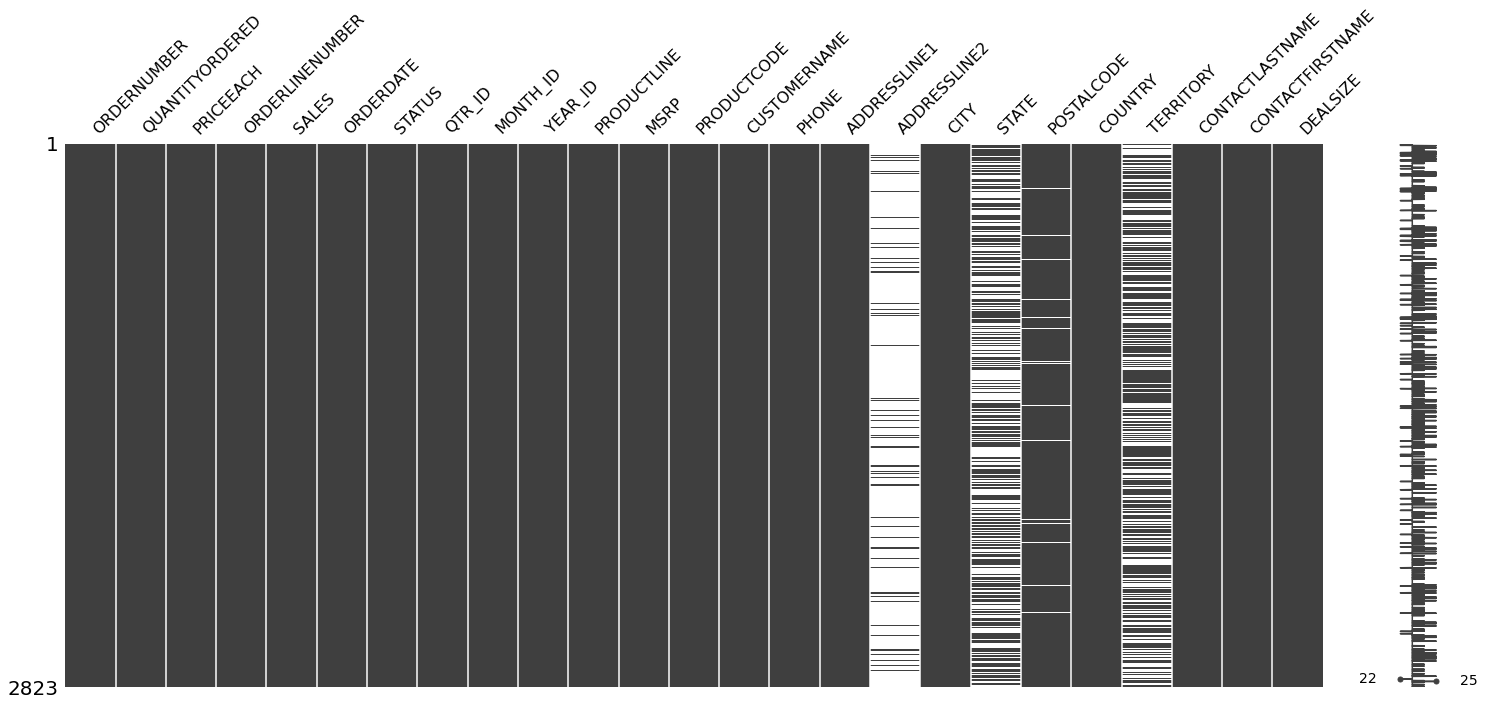

In [3]:

msno.matrix(data)

<AxesSubplot:>

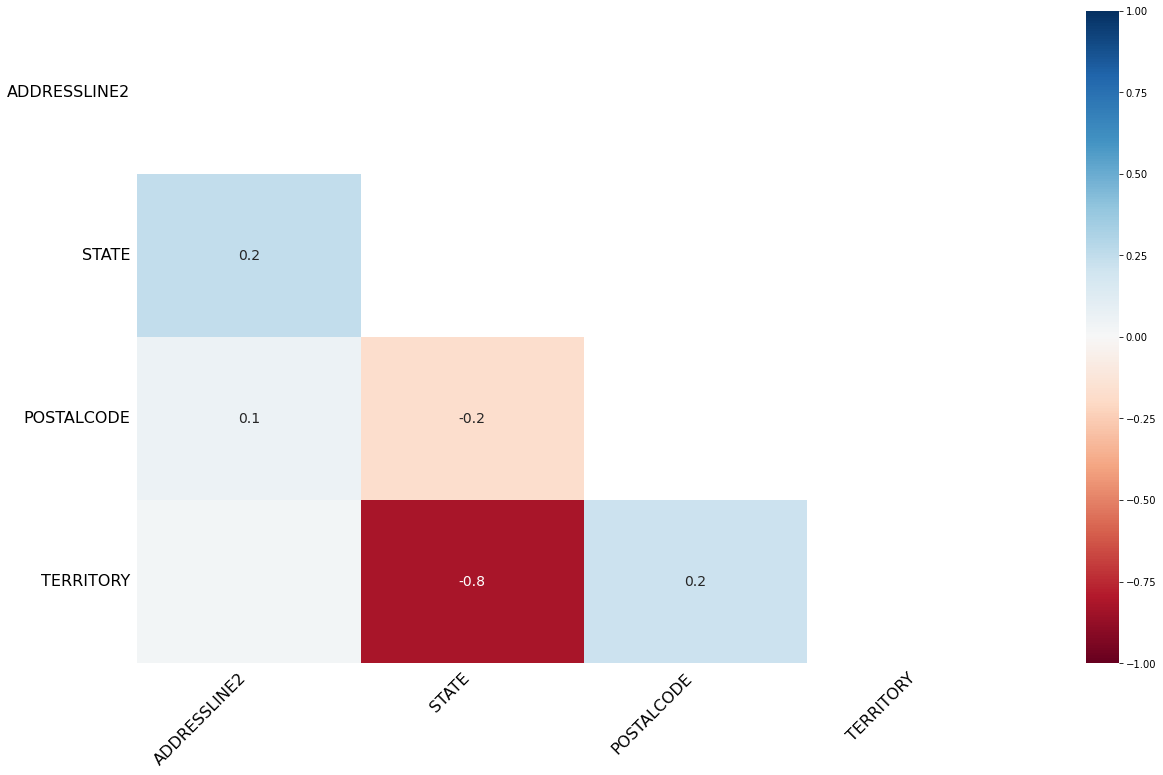

In [4]:
msno.heatmap(data)

missing value only occur on state and territory with -0.8 coefficient, meaning normally rows with a state result in empty territory. same for the other way around. lets investigate more.

In [5]:
data.sort_values(by='STATE')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2706,10283,22,88.15,10,1939.30,8/20/2004 0:00,Shipped,3,8,2004,...,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,NaN,Lincoln,Elizabeth,Small
2007,10235,33,60.05,12,1981.65,4/2/2004 0:00,Shipped,2,4,2004,...,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,NaN,Lincoln,Elizabeth,Small
230,10313,21,100.00,11,2669.10,10/22/2004 0:00,Shipped,4,10,2004,...,1900 Oak St.,NaN,Vancouver,BC,V3F 2K1,Canada,NaN,Tannamuri,Yoshi,Small
2784,10283,43,57.61,1,2477.23,8/20/2004 0:00,Shipped,3,8,2004,...,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,NaN,Lincoln,Elizabeth,Small
1659,10313,42,100.00,4,5581.80,10/22/2004 0:00,Shipped,4,10,2004,...,1900 Oak St.,NaN,Vancouver,BC,V3F 2K1,Canada,NaN,Tannamuri,Yoshi,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,10327,37,86.74,4,3209.38,11/10/2004 0:00,Resolved,4,11,2004,...,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Medium
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium


#### Checking for inconsistent data types

In [6]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

##### Changing the data type of variable 'ORDERDATE' from object to datetime

In [7]:
#change orderdate to datetime. others dtype reamin the same

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])


In [8]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


seems that the state only appear for Canada and the US, for other country, the data shows in territory instead.

anyway, all the ordering details are complete

##### Summary stats of Quantitative variables

In [9]:
describe = data.describe().transpose()
describe.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.000000,10258.725115,92.085478,10100.000000,10180.000000,10262.000000,10333.500000,10425.000000
QUANTITYORDERED,2823.000000,35.092809,9.741443,6.000000,27.000000,35.000000,43.000000,97.000000
PRICEEACH,2823.000000,83.658544,20.174277,26.880000,68.860000,95.700000,100.000000,100.000000
ORDERLINENUMBER,2823.000000,6.466171,4.225841,1.000000,3.000000,6.000000,9.000000,18.000000
SALES,2823.000000,3553.889072,1841.865106,482.130000,2203.430000,3184.800000,4508.000000,14082.800000
QTR_ID,2823.000000,2.717676,1.203878,1.000000,2.000000,3.000000,4.000000,4.000000
MONTH_ID,2823.000000,7.092455,3.656633,1.000000,4.000000,8.000000,11.000000,12.000000
YEAR_ID,2823.000000,2003.815090,0.699670,2003.000000,2003.000000,2004.000000,2004.000000,2005.000000
MSRP,2823.000000,100.715551,40.187912,33.000000,68.000000,99.000000,124.000000,214.000000


In [10]:
pd.DataFrame(data.nunique()).style.background_gradient(cmap="Blues")


,0
ORDERNUMBER,307
QUANTITYORDERED,58
PRICEEACH,1016
ORDERLINENUMBER,18
SALES,2763
ORDERDATE,252
STATUS,6
QTR_ID,4
MONTH_ID,12
YEAR_ID,3


It is observed that there are no negative values for the quantitative variables, which is a good sign because we cannot have negative prices or quantities.

##### Exploring the variables

Order Quantity Distribution


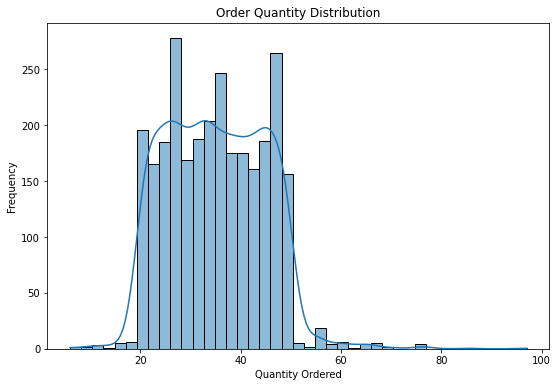

In [11]:
plt.figure(figsize=(9,6))
sns.histplot(data['QUANTITYORDERED'],kde=True)
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

From the distribution plot of quantity, we can infer that the orders are bulk orders. Majority of the order's quantity are between 20 -40 units.

##### Price Distribution

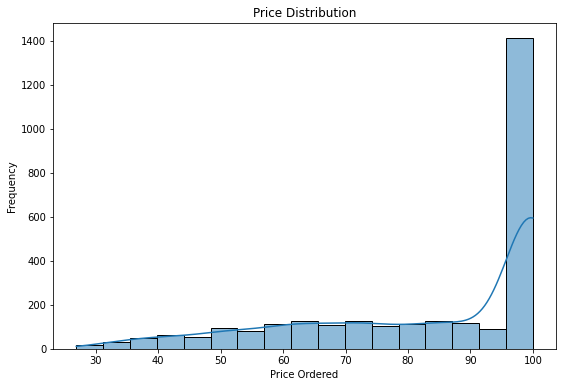

In [12]:
plt.figure(figsize=(9,6))
sns.histplot(data['PRICEEACH'],kde=True)
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

The distribution of Price is Left Skewed with max price of 100$. Interestingly, many of the orders recieved are of this price. Not investigating further about this particular product line which has the highest price beacuse the target is to segment the customers.

##### Sales Distrubutions

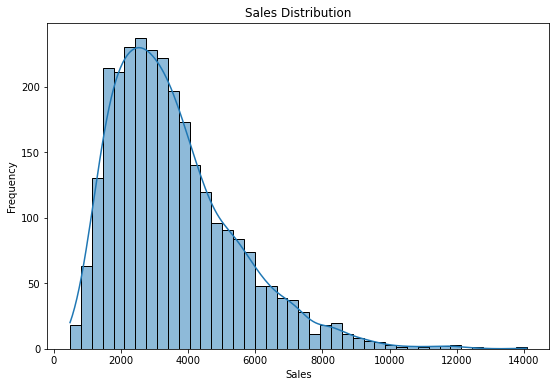

In [13]:

plt.figure(figsize=(9,6))
sns.histplot(data['SALES'],kde=True )
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Analyzing the STATUS variable

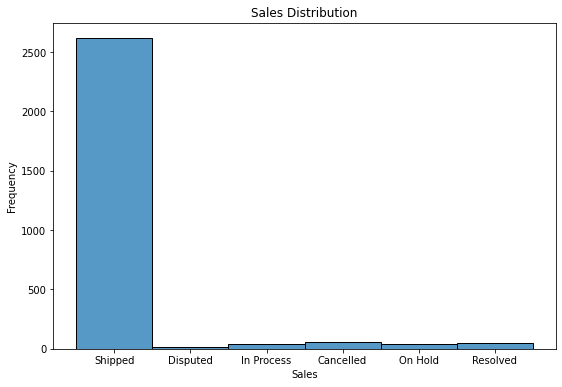

Shipped       92.702798
Cancelled      2.125399
Resolved       1.664896
On Hold        1.558626
In Process     1.452356
Disputed       0.495926
Name: STATUS, dtype: float64

In [14]:

plt.figure(figsize=(9,6))
sns.histplot(data['STATUS'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

data['STATUS'].value_counts(normalize=True)*100

Sales Distribution

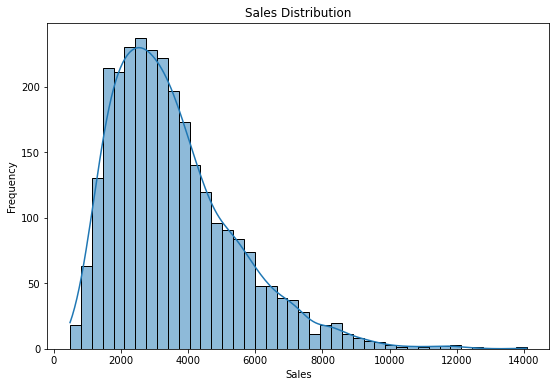

In [15]:
plt.figure(figsize=(9,6))
sns.histplot(data['SALES'],kde=True )
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Checking the time range of the data

In [16]:
data.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

We dont have the complete data for 2005.

Dealsize Distribution

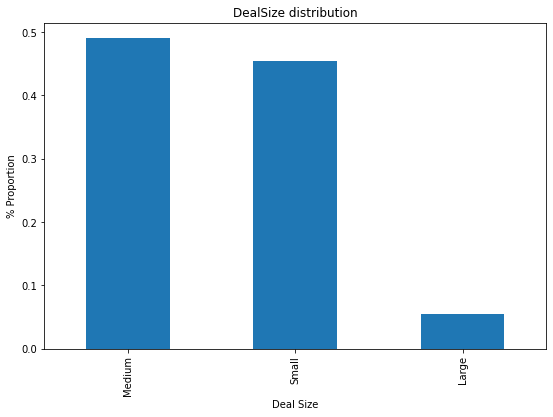

In [17]:
plt.figure(figsize=(9,6))
data['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

#### Analyzing KPIs

##### Annual Revenue

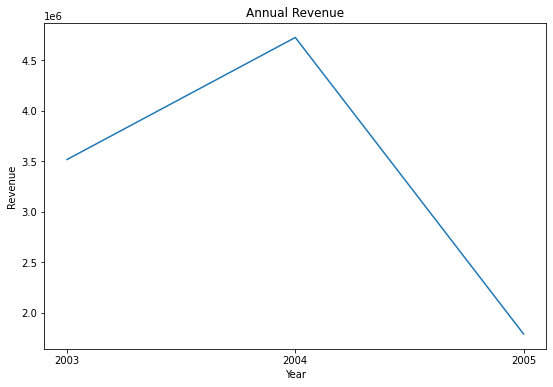

In [18]:
#Annual Revenue
plt.figure(figsize=(9,6))
data.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

As we dont have the complete data for 2005, analyzing the Annual Revenue can be misleading. Instead, we can analyze Monthy Revenue.

Monthly Revenue

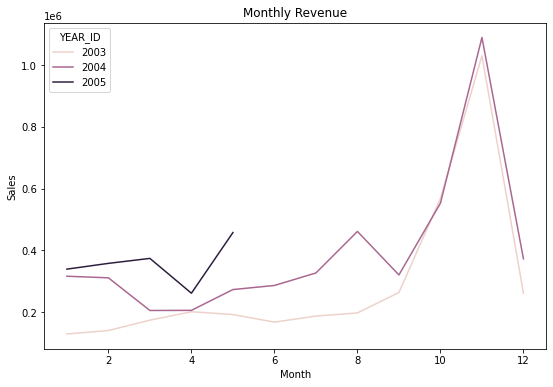

In [19]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

This clearly shows that the revenue is growing especially in October and November. It can be the result of the seasonality(Thnaks Giving and other festivitues). We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future.

##### Monthly Revenue Growth Rate:

In [20]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


Text(0.5, 1.0, 'Sales Growth YOY')

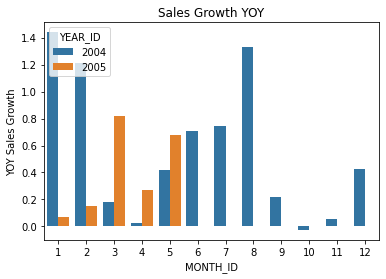

In [21]:
YOY_df = monthly_revenue.groupby(['MONTH_ID','YEAR_ID'])['SALES'].max().pct_change().reset_index()
YOY_df = YOY_df[YOY_df['YEAR_ID'] != 2003]
sns.barplot(x="MONTH_ID",y='SALES',hue="YEAR_ID", data=YOY_df)
plt.ylabel('YOY Sales Growth')
plt.title('Sales Growth YOY')

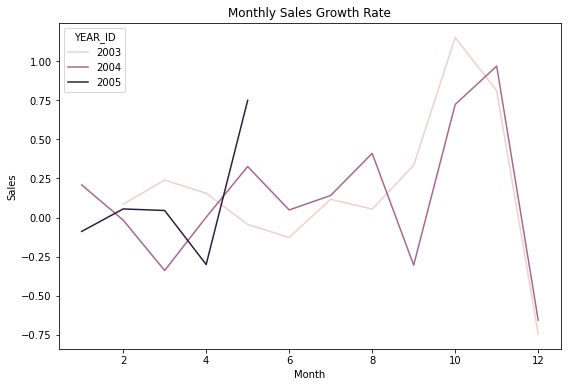

In [22]:
#Monthly Sales Growth Rate
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

#### Top 10 countries by Sales

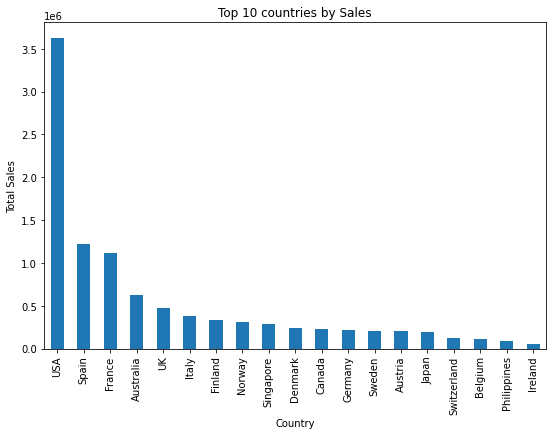

In [23]:
plt.figure(figsize=(9,6))
top_cities = data.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

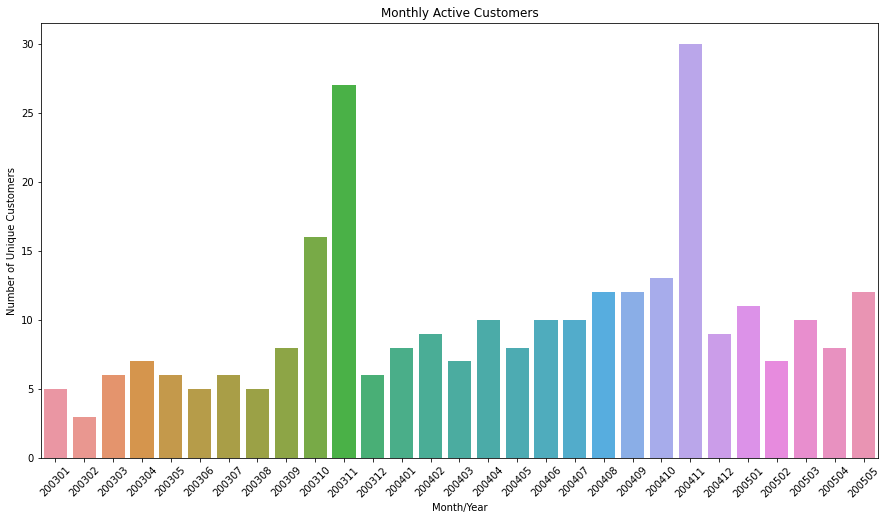

In [24]:

data['YEAR_MONTH'] = data['YEAR_ID'].map(str)+data['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = data.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(data=monthly_active,x='YEAR_MONTH',y='CUSTOMERNAME')
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.show()

As expected, customers are highly active during the months of November and October. The number of active customers increased from 2003 to 2004 which indicates that the company is successful in retention/acquisition of ol/new customers.

#### Average Sales per Order

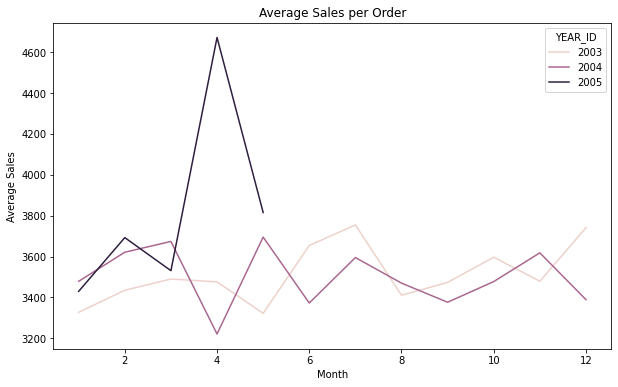

In [25]:
#Average Sales per Order
average_revenue = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

#### New Customers Growth Rate

New customer is whoever did his/her first purchase in the time window we defined, i.e., Mothly in this analysis.

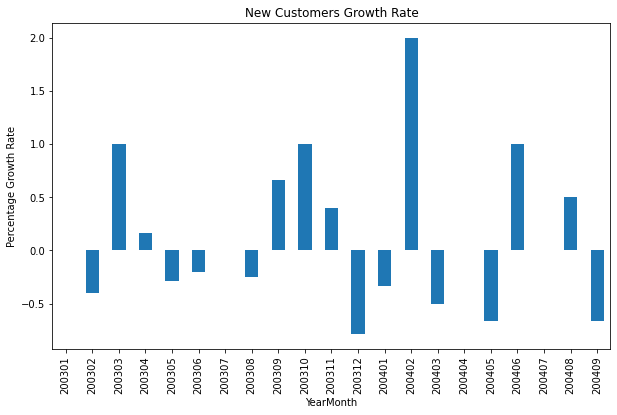

In [26]:
#New Customers Growth Rate
df_first_purchase = data.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
df_first_purchase.columns = ['CUSTOMERNAME','FirstPurchaseDate']

plt.figure(figsize=(10,6))
df_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Growth Rate')
plt.show()

The highest growth rate is observed in February 2002. This can be investigated further to betetr understand what factors contributed the growth.

# Segmentation with number of clusters chosen randomly

## RFM analysis
 
What is RFM analysis?

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

1. Recency: How recently has the customer made a transaction with us. 
2. Frequency: How frequent is the customer in ordering/buying some product from us
3. Monetary: How much does the customer spend on purchasing products from us.

#### Calculating Recency

In [27]:
data['ORDERDATE'].max()
data['ORDERDATE'].min()

Timestamp('2003-01-06 00:00:00')

The data date range from 2003-01-06 to 2005-05-31, Lets assume today is 2005-05-31

In [28]:
df_recency = data.groupby(by='CUSTOMERNAME',as_index=False)['ORDERDATE'].max()
df_recency.columns = ['customer_name','last_purchase_date']
recent_date = df_recency['last_purchase_date'].max()
df_recency['recency'] = df_recency['last_purchase_date'].apply(
    lambda x: (recent_date - x).days+1
)
df_recency

,customer_name,last_purchase_date,recency
0,"AV Stores, Co.",2004-11-17,196
1,Alpha Cognac,2005-03-28,65
2,Amica Models & Co.,2004-09-09,265
3,"Anna's Decorations, Ltd",2005-03-09,84
4,Atelier graphique,2004-11-25,188
...,...,...,...
87,"Vida Sport, Ltd",2004-08-30,275
88,Vitachrome Inc.,2004-11-05,208
89,"Volvo Model Replicas, Co",2004-11-19,194
90,West Coast Collectables Co.,2004-01-29,489


<function matplotlib.pyplot.show(close=None, block=None)>

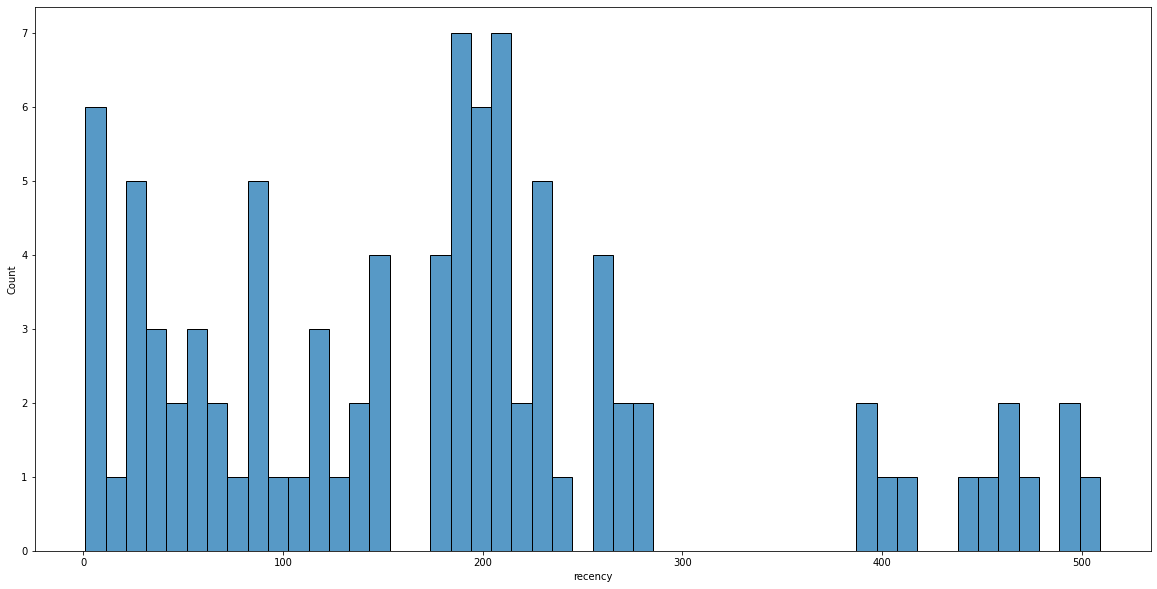

In [29]:
df_recency[['customer_name','recency']]
plt.figure(figsize=(20,10))
sns.histplot(data=df_recency.sort_values(by='recency'),x='recency',bins=50)
plt.show

In [30]:
df_recency.sort_values('recency')

,customer_name,last_purchase_date,recency
44,La Rochelle Gifts,2005-05-31,1
33,Euro Shopping Channel,2005-05-31,1
28,Diecast Classics Inc.,2005-05-30,2
64,Petit Auto,2005-05-30,2
55,Mini Gifts Distributors Ltd.,2005-05-29,3
...,...,...,...
26,Daedalus Designs Imports,2004-02-21,466
73,Signal Collectibles Ltd.,2004-02-10,477
90,West Coast Collectables Co.,2004-01-29,489
30,"Double Decker Gift Stores, Ltd",2004-01-22,496


In [31]:
data = data.join(df_recency.set_index('customer_name'),on='CUSTOMERNAME')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR_MONTH,last_purchase_date,recency
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NY,10022,USA,NaN,Yu,Kwai,Small,200302,2004-11-15,198
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,200305,2005-03-30,63
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,200307,2005-03-17,76
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,CA,90003,USA,NaN,Young,Julie,Medium,200308,2005-01-12,140
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,CA,NaN,USA,NaN,Brown,Julie,Medium,200310,2005-02-23,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,NaN,28034,Spain,EMEA,Freyre,Diego,Small,200412,2005-05-31,1
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,200501,2005-01-31,121
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,200503,2005-05-31,1
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,NaN,31000,France,EMEA,Roulet,Annette,Small,200503,2005-03-28,65


#### Calculating Frequency

I then calculate the frequency of frequent transactions of the customer in ordering/buying some product from the company.

In [32]:
frequency_df = data.drop_duplicates().groupby(
    by=['CUSTOMERNAME'], as_index=False)['ORDERDATE'].count()
frequency_df.columns = ['customer_name', 'frequency']
frequency_df.head()

,customer_name,frequency
0,"AV Stores, Co.",51
1,Alpha Cognac,20
2,Amica Models & Co.,26
3,"Anna's Decorations, Ltd",46
4,Atelier graphique,7


#### Calculating Monetary Value
Here we are calculating the monetary value of customer spend on purchasing products from the company

In [33]:

monetary_df = data.groupby(by='CUSTOMERNAME', as_index=False)['SALES'].sum()
monetary_df.columns = ['customer_name', 'monetary']
monetary_df.head()

,customer_name,monetary
0,"AV Stores, Co.",157807.81
1,Alpha Cognac,70488.44
2,Amica Models & Co.,94117.26
3,"Anna's Decorations, Ltd",153996.13
4,Atelier graphique,24179.96


#### Merging all three columns in one dataframe

In [34]:
rf_df = df_recency.merge(frequency_df, on='customer_name')
rfm_df = rf_df.merge(monetary_df, on='customer_name').drop(
    columns='last_purchase_date')
rfm_df.head()

,customer_name,recency,frequency,monetary
0,"AV Stores, Co.",196,51,157807.81
1,Alpha Cognac,65,20,70488.44
2,Amica Models & Co.,265,26,94117.26
3,"Anna's Decorations, Ltd",84,46,153996.13
4,Atelier graphique,188,7,24179.96


#### Ranking Customer’s based upon their recency, frequency, and monetary score

In [35]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = ((rfm_df['R_rank']/rfm_df['R_rank'].max())*5).round(2)
rfm_df['F_rank_norm'] = ((rfm_df['F_rank']/rfm_df['F_rank'].max())*5).round(2)
rfm_df['M_rank_norm'] = ((rfm_df['F_rank']/rfm_df['M_rank'].max())*5).round(2)
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.iloc[:5].style.background_gradient(cmap="Pastel1", low=0.50, high=1.0)

,customer_name,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,"AV Stores, Co.",196,51,157807.810000,2.160000,4.780000,4.780000
1,Alpha Cognac,65,20,70488.440000,3.880000,1.410000,1.410000
2,Amica Models & Co.,265,26,94117.260000,0.930000,2.720000,2.720000
3,"Anna's Decorations, Ltd",84,46,153996.130000,3.720000,4.540000,4.540000
4,Atelier graphique,188,7,24179.960000,2.510000,0.110000,0.110000


#### Calculating RFM score

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. 

There are other weight of RFM to calculate the RFM score. It depends on which part the subject matter experts find the elements more important compare to others.

* Formula used for calculating rfm score in this report is : 0.15* Recency score + 0.28* Frequency score + 0.57 * Monetary score

In [36]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']

rfm_df = rfm_df.round(2)
rfm_df.iloc[:5].style.background_gradient(cmap="Pastel1", low=0.50, high=1.0)

,customer_name,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,"AV Stores, Co.",196,51,157807.810000,2.160000,4.780000,4.780000,4.390000
1,Alpha Cognac,65,20,70488.440000,3.880000,1.410000,1.410000,1.780000
2,Amica Models & Co.,265,26,94117.260000,0.930000,2.720000,2.720000,2.450000
3,"Anna's Decorations, Ltd",84,46,153996.130000,3.720000,4.540000,4.540000,4.420000
4,Atelier graphique,188,7,24179.960000,2.510000,0.110000,0.110000,0.470000


#### Rating Customer based upon the RFM score
- rfm score >4.5 : Top Customer
- 4.5 > rfm score > 4 : High Value Customer
- 4>rfm score >3 : Medium value customer
- 3>rfm score>1.6 : Low-value customer
- rfm score<1.6 :Lost Customer

In [37]:

rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
                            

rfm_df[['customer_name', 'RFM_Score', 'Customer_segment']].head(20)

,customer_name,RFM_Score,Customer_segment
0,"AV Stores, Co.",4.39,High value Customer
1,Alpha Cognac,1.78,Low Value Customers
2,Amica Models & Co.,2.45,Low Value Customers
3,"Anna's Decorations, Ltd",4.42,High value Customer
4,Atelier graphique,0.47,Lost Customers
5,"Australian Collectables, Ltd",2.37,Low Value Customers
6,"Australian Collectors, Co.",4.55,Top Customers
7,"Australian Gift Network, Co",1.15,Lost Customers
8,Auto Assoc. & Cie.,1.08,Lost Customers
9,Auto Canal Petit,3.19,Medium Value Customer


<AxesSubplot:ylabel='Customer_segment'>

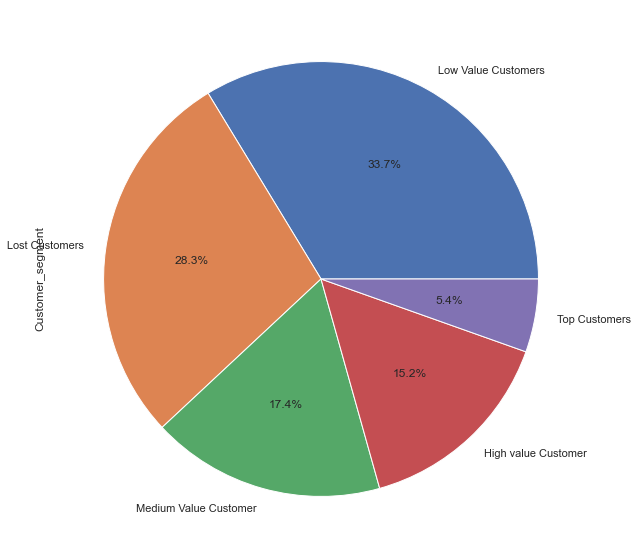

In [38]:
sns.set(rc={'figure.figsize':(12,10)})
rfm_df['Customer_segment'].value_counts().plot.pie(autopct="%.1f%%")

In [39]:
customer_seg_df = rfm_df['Customer_segment'].value_counts().reset_index()
customer_seg_df['percentage'] = customer_seg_df['Customer_segment'].apply(lambda  x:(x*100/customer_seg_df['Customer_segment'].sum()).round(2))
customer_seg_df.rename(columns={'index':'customer_segment_type','Customer_segment':'count'},inplace=True)
customer_seg_df

,customer_segment_type,count,percentage
0,Low Value Customers,31,33.70
1,Lost Customers,26,28.26
2,Medium Value Customer,16,17.39
3,High value Customer,14,15.22
4,Top Customers,5,5.43


In [40]:
customer_seg_df["customer_seg_rank"] = np.where(customer_seg_df['customer_segment_type'] == 'Top Customers', "1",
                                      (np.where(
                                        customer_seg_df['customer_segment_type'] == 'High value Customer',
                                        "2",
                                        (np.where(
    customer_seg_df['customer_segment_type'] == 'Medium Value Customer',
                             "3",
                             np.where(customer_seg_df['customer_segment_type'] == 'Low Value Customers',
                            '4', '5'))))))

customer_seg_df.sort_values(by='customer_seg_rank',inplace=True)
customer_seg_df

,customer_segment_type,count,percentage,customer_seg_rank
4,Top Customers,5,5.43,1
3,High value Customer,14,15.22,2
2,Medium Value Customer,16,17.39,3
0,Low Value Customers,31,33.70,4
1,Lost Customers,26,28.26,5


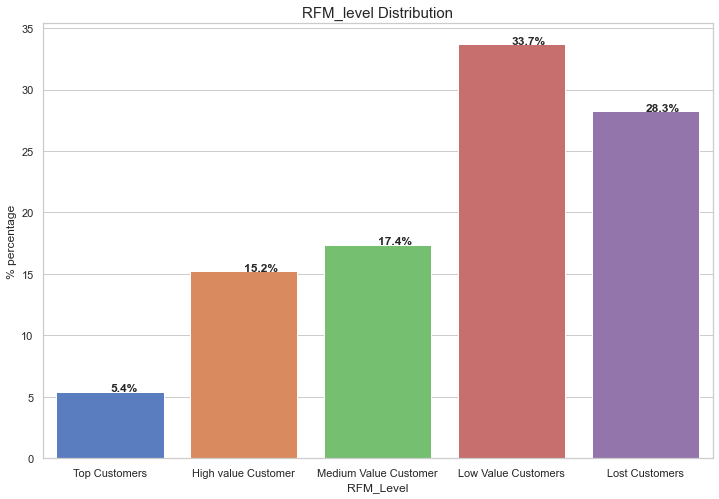

In [41]:

#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=customer_seg_df['customer_segment_type'], y='percentage', data=customer_seg_df, ci=None, palette="muted",orient='v', )
ax.set_title("RFM_level Distribution", fontsize=15)
ax.set_xlabel ("RFM_Level")
ax.set_ylabel ("% percentage")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

##### Segmentation using KMeans Clustering

#### Data Preprocessing for KMeans

K Means Assumptions

- All variables have symmetrical (Normal) Distribution
- All Variables have same average value(approx)
- All Variables have same variance(approx)

#### Check the distribution of the variables

In [42]:
df = rfm_df[['customer_name','recency','frequency','monetary']]
df

,customer_name,recency,frequency,monetary
0,"AV Stores, Co.",196,51,157807.81
1,Alpha Cognac,65,20,70488.44
2,Amica Models & Co.,265,26,94117.26
3,"Anna's Decorations, Ltd",84,46,153996.13
4,Atelier graphique,188,7,24179.96
...,...,...,...,...
87,"Vida Sport, Ltd",275,31,117713.56
88,Vitachrome Inc.,208,25,88041.26
89,"Volvo Model Replicas, Co",194,19,75754.88
90,West Coast Collectables Co.,489,13,46084.64


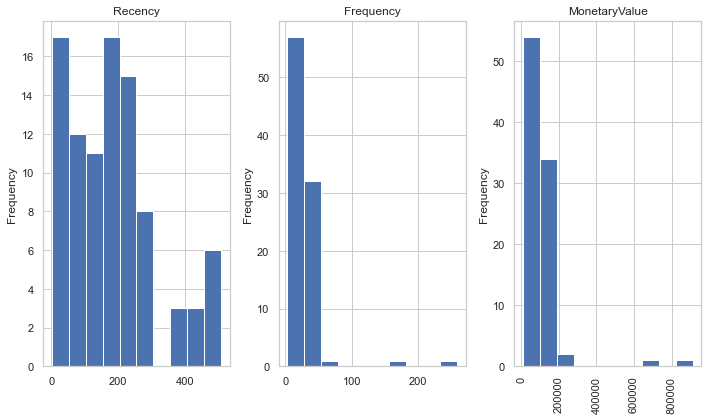

In [43]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
df['recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
df['frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
df['monetary'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()

#### Removing the skewness by performing log transformation on the variables

In [44]:
df_log = df
df_log[['recency','frequency','monetary']] = np.log(df[['recency','frequency','monetary']])
df_log

C:\Users\Jason Chau\AppData\Local\Temp\ipykernel_20148\4191285529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log[['recency','frequency','monetary']] = np.log(df[['recency','frequency','monetary']])


,customer_name,recency,frequency,monetary
0,"AV Stores, Co.",5.278115,3.931826,11.969133
1,Alpha Cognac,4.174387,2.995732,11.163204
2,Amica Models & Co.,5.579730,3.258097,11.452297
3,"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
4,Atelier graphique,5.236442,1.945910,10.093279
...,...,...,...,...
87,"Vida Sport, Ltd",5.616771,3.433987,11.676009
88,Vitachrome Inc.,5.337538,3.218876,11.385561
89,"Volvo Model Replicas, Co",5.267858,2.944439,11.235258
90,West Coast Collectables Co.,6.192362,2.564949,10.738235


#### Distribution of Recency, Frequency and MonetaryValue after Log Transformation

c:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jason Chau\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

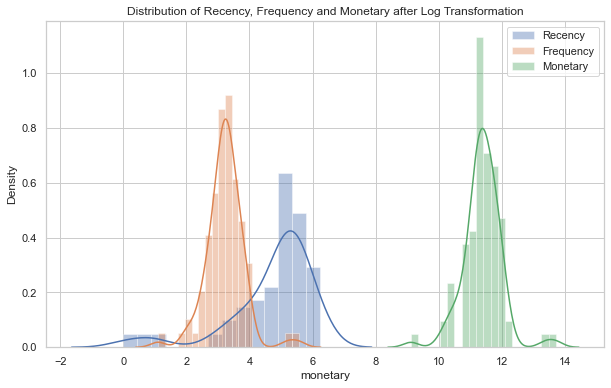

In [45]:
plt.figure(figsize=(10,6))

#plt.subplot(1,3,1)
sns.distplot(df_log['recency'],label='Recency')

#plt.subplot(1,3,1)
sns.distplot(df_log['frequency'],label='Frequency')

#plt.subplot(1,3,1)
sns.distplot(df_log['monetary'],label='Monetary')

plt.title('Distribution of Recency, Frequency and Monetary after Log Transformation')
plt.legend()
plt.show()

#### Standardizing the variables using StandardScaler() for equal variance and mean

In [46]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(df_log[['recency','frequency','monetary']])

# Scale and center the data
data_normalized = scaler.transform(df_log[['recency','frequency','monetary']])

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=df_log[['recency','frequency','monetary']].index, columns=df_log[['recency','frequency','monetary']].columns)

# Print summary statistics
data_normalized.describe().round(2)

,recency,frequency,monetary
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


#### Choosing number of Clusters using Elbow Method

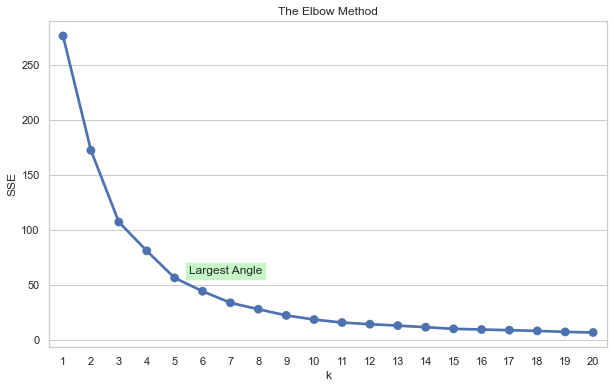

In [47]:
#KMeans
from sklearn.cluster import KMeans

# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

    
plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

#### Running KMeans with 5 clusters

In [50]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_rfm = df.assign(Cluster=cluster_labels)
data_rfm

,customer_name,recency,frequency,monetary,Cluster
0,"AV Stores, Co.",5.278115,3.931826,11.969133,3
1,Alpha Cognac,4.174387,2.995732,11.163204,0
2,Amica Models & Co.,5.579730,3.258097,11.452297,0
3,"Anna's Decorations, Ltd",4.430817,3.828641,11.944683,3
4,Atelier graphique,5.236442,1.945910,10.093279,2
...,...,...,...,...,...
87,"Vida Sport, Ltd",5.616771,3.433987,11.676009,3
88,Vitachrome Inc.,5.337538,3.218876,11.385561,0
89,"Volvo Model Replicas, Co",5.267858,2.944439,11.235258,0
90,West Coast Collectables Co.,6.192362,2.564949,10.738235,2


In [53]:
# Group the data by cluster
grouped = data_rfm.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
  }).round(1)

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0           5.2       3.1     11.3    43
1           0.6       3.6     11.7     4
2           5.7       2.3     10.4    12
3           4.5       3.6     11.8    31
4           0.5       5.4     13.6     2

#### Building Customer Personas

Customer Pesonas can build by determining the summary stats of RFM values or Snake Plot. Snake Plots is a Market Research technique used to compare segments. Visual representation of each segment's attributes helps us to determine the relative Importance of segment attributes

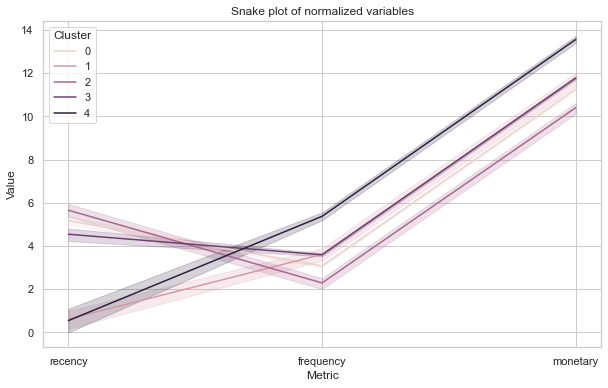

In [56]:
data_rfm_melt = pd.melt(data_rfm.reset_index(), id_vars=['customer_name', 'Cluster'],
                        value_vars=['recency', 'frequency', 'monetary'], 
                        var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=data_rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

#### Calculating relative importance of each attribute

In [57]:
# Calculate average RFM values for each cluster
cluster_avg = data_rfm.groupby(['Cluster']).mean() 
print(cluster_avg)


          recency  frequency   monetary
Cluster                                
0        5.172889   3.078678  11.256744
1        0.621227   3.612949  11.742000
2        5.655294   2.292071  10.402356
3        4.544563   3.593503  11.778399
4        0.549306   5.374892  13.557946


In [61]:
# Calculate average RFM values for the total customer population
population_avg = df.mean()
print(population_avg)

recency       4.725682
frequency     3.222698
monetary     11.392201
dtype: float64


C:\Users\Jason Chau\AppData\Local\Temp\ipykernel_20148\3405538258.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population_avg = df.mean()


In [62]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         recency  frequency  monetary
Cluster                              
0           0.09      -0.04     -0.01
1          -0.87       0.12      0.03
2           0.20      -0.29     -0.09
3          -0.04       0.12      0.03
4          -0.88       0.67      0.19


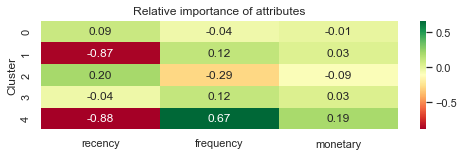

In [63]:
#Plot Relative Importance

# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()